In [6]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

# funciones desarrolladas
from functions.cargar_data import *
from functions.modelos import *
from functions.graficas import plot_gt

pd.set_option('display.max_columns', 100)

In [7]:
# carga datos diádicos
dd_deptos = cargar_dd_deptos()
dd_deptos.dtypes

cod                               int64
depto_origen                      int64
depto_destino                     int64
personas_mig                      int64
personas_mig_18_25                int64
personas_mig_26_35                int64
personas_mig_100k                 int64
pob_origen                        int64
pob_destino                       int64
dist                              int64
dist_km                           int64
pbi_origen                        int64
pbi_porcen_ori                  float64
pbi_destino                       int64
pbi_porcen_des                  float64
pbi_origen_millardos            float64
pbi_destino_millardos           float64
largo_limite                    float64
dummy_limit                        bool
empresas_origen                   int64
empresas_destino                  int64
menores_25_origen                 int64
menores_25_destino                int64
pob_destino_k                   float64
pob_origen_k                    float64


In [8]:
dd_deptos.head()

,cod,depto_origen,depto_destino,personas_mig,personas_mig_18_25,personas_mig_26_35,personas_mig_100k,pob_origen,pob_destino,dist,dist_km,pbi_origen,pbi_porcen_ori,pbi_destino,pbi_porcen_des,pbi_origen_millardos,pbi_destino_millardos,largo_limite,dummy_limit,empresas_origen,empresas_destino,menores_25_origen,menores_25_destino,pob_destino_k,pob_origen_k,nom_depto_orig,nom_depto_des,edad_prom_ori,porc_ocupados_ori,edad_prom_des,porc_ocupados_des,tasa_desemp_mujeres_2011_ori,tasa_desemp_varones_2011_ori,tasa_desemp_total_2011_ori,tasa_desemp_mujeres_2011_des,tasa_desemp_varones_2011_des,tasa_desemp_total_2011_des,log_pbi_destino,log_dist_km,log_pbi_origen_millardos,log_pbi_destino_millardos,log_pob_destino_k,log_pob_origen_k,log_edad_prom_des,log_porc_ocupados_des,largo_limite_km
0,102,1,2,914,114,247,891,1318755,73377,610726,611,465848031,50.3,14214980,1.5,465.848,14.215,0.0001,False,3124,55,456072,30880,73.377,1318.755,MONTEVIDEO,ARTIGAS,37.481048,70.395702,33.966911,63.540489,7.4,5.1,6.2,11.5,5.4,8.1,16.469807,6.415097,6.143859,2.654298,4.295611,7.184443,3.525387,4.151677,1.000000e-07
1,302,3,2,74,9,22,70,520173,73377,601915,602,86306492,9.3,14214980,1.5,86.306,14.215,0.0001,False,563,55,197993,30880,73.377,520.173,CANELONES,ARTIGAS,35.406640,71.045180,33.966911,63.540489,8.1,4.3,6.0,11.5,5.4,8.1,16.469807,6.400257,4.457899,2.654298,4.295611,6.254161,3.525387,4.151677,1.000000e-07
2,402,4,2,15,0,6,14,84698,73377,406694,407,17048887,1.8,14214980,1.5,17.049,14.215,0.0001,False,88,55,33360,30880,73.377,84.698,CERRO LARGO,ARTIGAS,35.614749,65.582039,33.966911,63.540489,3.8,1.7,2.6,11.5,5.4,8.1,16.469807,6.008813,2.836092,2.654298,4.295611,4.439092,3.525387,4.151677,1.000000e-07
3,502,5,2,28,7,8,25,123203,73377,556292,556,43788749,4.7,14214980,1.5,43.789,14.215,0.0001,False,60,55,43030,30880,73.377,123.203,COLONIA,ARTIGAS,37.632420,76.058415,33.966911,63.540489,4.1,2.5,3.2,11.5,5.4,8.1,16.469807,6.320768,3.779383,2.654298,4.295611,4.813833,3.525387,4.151677,1.000000e-07
4,602,6,2,32,0,10,29,57084,73377,446123,446,13023942,1.4,14214980,1.5,13.024,14.215,0.0001,False,40,55,22663,30880,73.377,57.084,DURAZNO,ARTIGAS,35.093021,67.284108,33.966911,63.540489,13.1,5.8,8.9,11.5,5.4,8.1,16.469807,6.100319,2.566794,2.654298,4.295611,4.044524,3.525387,4.151677,1.000000e-07


## 1. Modelos con Montevideo

### 1.1. **Modelo restringido en origen**


- Logaritmo de la población en destino

- Logaritmo de la edad promedio en destino

- Logaritmo del PBI en destino en millardos

- Logaritmo del porcentaje de desocupados en destino

- Logaritmo de la distancia en kilómetros


Devuelve un R-cuadrado superior a las demás combinaciones de variables independientes.

In [4]:
dd_deptos.head()

,cod,depto_origen,depto_destino,personas_mig,personas_mig_18_25,personas_mig_26_35,personas_mig_100k,pob_origen,pob_destino,dist,...,porc_ocupados_des,log_pbi_destino,log_dist_km,log_pbi_origen_millardos,log_pbi_destino_millardos,log_pob_destino_k,log_pob_origen_k,log_edad_prom_des,log_porc_ocupados_des,largo_limite_km
0,102,1,2,914,114,247,891,1318755,73377,610726,...,63.540489,16.469807,6.415097,6.143859,2.654298,4.295611,7.184443,3.525387,4.151677,1.000000e-07
1,302,3,2,74,9,22,70,520173,73377,601915,...,63.540489,16.469807,6.400257,4.457899,2.654298,4.295611,6.254161,3.525387,4.151677,1.000000e-07
2,402,4,2,15,0,6,14,84698,73377,406694,...,63.540489,16.469807,6.008813,2.836092,2.654298,4.295611,4.439092,3.525387,4.151677,1.000000e-07
3,502,5,2,28,7,8,25,123203,73377,556292,...,63.540489,16.469807,6.320768,3.779383,2.654298,4.295611,4.813833,3.525387,4.151677,1.000000e-07
4,602,6,2,32,0,10,29,57084,73377,446123,...,63.540489,16.469807,6.100319,2.566794,2.654298,4.295611,4.044524,3.525387,4.151677,1.000000e-07


In [28]:
formula = """
personas_mig ~
nom_depto_orig +
log_pob_destino_k +
log_edad_prom_des + 
log_pbi_destino_millardos +
log_porc_ocupados_des + 
log_dist_km
-1
"""

# entrena y ajusta el modelo
f = sm.families.Poisson()
prodSim = smf.glm(formula=formula, data=dd_deptos, family=f).fit()

# resultados
prodSim.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:           personas_mig   No. Observations:                  342
Model:                            GLM   Df Residuals:                      318
Model Family:                 Poisson   Df Model:                           23
Link Function:                    Log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -13551.
Date:                Tue, 22 Feb 2022   Deviance:                       24875.
Time:                        10:08:42   Pearson chi2:                 2.77e+04
No. Iterations:                     6   Pseudo R-squ. (CS):              1.000
Covariance Type:            nonrobust                                         
==================================================================================================
                                     coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
nom_depto_orig[ARTIGAS]           13.2386      0.470     28.170      0.000      12.318      14.160
nom_depto_orig[CANELONES]         13.0442      0.468     27.894      0.000      12.128      13.961
nom_depto_orig[CERRO LARGO]       12.9048      0.470     27.446      0.000      11.983      13.826
nom_depto_orig[COLONIA]           12.6024      0.470     26.841      0.000      11.682      13.523
nom_depto_orig[DURAZNO]           12.3588      0.470     26.296      0.000      11.438      13.280
nom_depto_orig[FLORES]            11.4094      0.470     24.273      0.000      10.488      12.331
nom_depto_orig[FLORIDA]           12.1343      0.469     25.846      0.000      11.214      13.055
nom_depto_orig[LAVALLEJA]         12.1102      0.470     25.787      0.000      11.190      13.031
nom_depto_orig[MALDONADO]         12.6923      0.470     27.014      0.000      11.771      13.613
nom_depto_orig[MONTEVIDEO]        14.9960      0.469     31.942      0.000      14.076      15.916
nom_depto_orig[PAYSANDU]          12.9175      0.469     27.516      0.000      11.997      13.838
nom_depto_orig[RIO NEGRO]         12.4089      0.470     26.406      0.000      11.488      13.330
nom_depto_orig[RIVERA]            13.0778      0.470     27.821      0.000      12.156      13.999
nom_depto_orig[ROCHA]             12.4558      0.470     26.490      0.000      11.534      13.377
nom_depto_orig[SALTO]             13.1517      0.470     27.987      0.000      12.231      14.073
nom_depto_orig[SAN JOSE]          12.0249      0.469     25.625      0.000      11.105      12.945
nom_depto_orig[SORIANO]           12.6904      0.470     27.027      0.000      11.770      13.611
nom_depto_orig[TACUAREMBO]        13.0446      0.470     27.767      0.000      12.124      13.965
nom_depto_orig[TREINTA Y TRES]    12.3891      0.470     26.346      0.000      11.467      13.311
log_pob_destino_k                  0.4180      0.013     32.632      0.000       0.393       0.443
log_edad_prom_des                 -3.0930      0.124    -24.857      0.000      -3.337      -2.849
log_pbi_destino_millardos          0.5221      0.013     41.322      0.000       0.497       0.547
log_porc_ocupados_des              0.8514      0.093      9.113      0.000       0.668       1.035
log_dist_km                       -0.6906      0.004   -167.398      0.000      -0.699      -0.682
==================================================================================================
"""

$R²$ = 0.9883

RMSE = 210.8297

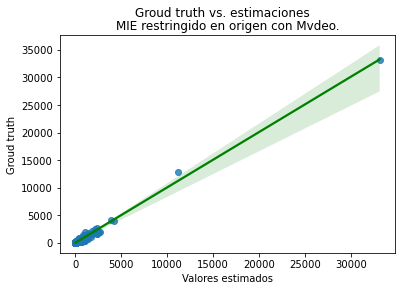

In [27]:
actual_counts = dd_deptos.personas_mig
predicted_counts = prodSim.predict()

print_scores_simple(actual_counts, predicted_counts)

title = 'Groud truth vs. estimaciones'
subtitle = 'MIE restringido en origen con Mvdeo.'

plot_gt(actual_counts, predicted_counts, title, subtitle)

In [8]:
prodSim.save("modelos/restringido_origen_mvo.pickle")

### 1.2. **Restringido en origen pero prediciendo migrantes de 18 a 24 años**

$R²$ = 0.8987

RMSE = 110.7891

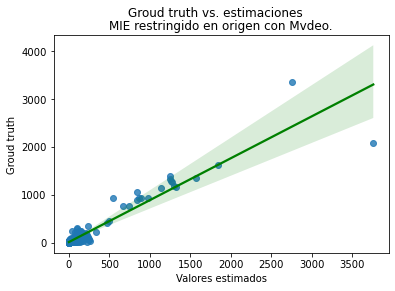

In [20]:
formula = """
personas_mig_18_25 ~ nom_depto_orig + dummy_limit
+ largo_limite_km + pbi_destino_millardos + dist_km + -1
"""

prodSim = smf.glm(formula=formula, data=dd_deptos, family=f).fit()

# resultados
actual_counts = dd_deptos.personas_mig_18_25
predicted_counts = prodSim.predict()

print_scores_simple(actual_counts, predicted_counts)

title = 'Groud truth vs. estimaciones'
subtitle = 'MIE restringido en origen con Mvdeo.'

plot_gt(actual_counts, predicted_counts, title, subtitle)

### 1.3. **Restringido en origen pero prediciendo migrantes de 26 a 35**

$R²$ = 0.8218

RMSE = 196.2055

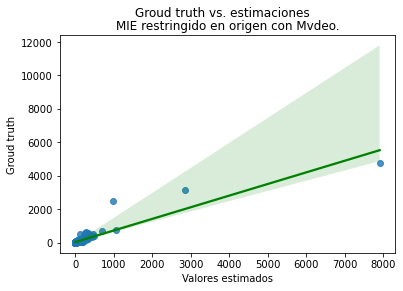

In [21]:
formula = """
personas_mig_26_35 ~ nom_depto_orig + dummy_limit
+ largo_limite_km + pbi_destino_millardos + dist_km + -1
"""

prodSim = smf.glm(formula=formula, data=dd_deptos, family=f).fit()

# resultados
actual_counts = dd_deptos.personas_mig_26_35
predicted_counts = prodSim.predict()

print_scores_simple(actual_counts, predicted_counts)

title = 'Groud truth vs. estimaciones'
subtitle = 'MIE restringido en origen con Mvdeo.'

plot_gt(actual_counts, predicted_counts, title, subtitle)

## 2. Modelos sin Montevideo

### 2.1. **Restringido en origen con mismas var. indep. pero sin Montevideo**


In [22]:
dd_deptos_no_mvo = dd_deptos.loc[(dd_deptos.depto_origen!=1) & (dd_deptos.depto_destino!=1)]

formula = """
personas_mig ~ nom_depto_orig + dummy_limit + menores_25_destino
+ largo_limite_km + pbi_destino_millardos + dist_km -1
"""

prodSim = smf.glm(formula=formula, data=dd_deptos_no_mvo, family=f).fit()

prodSim.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:           personas_mig   No. Observations:                  306
Model:                            GLM   Df Residuals:                      283
Model Family:                 Poisson   Df Model:                           22
Link Function:                    Log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -5201.1
Date:                Tue, 22 Feb 2022   Deviance:                       8508.3
Time:                        09:46:35   Pearson chi2:                 9.06e+03
No. Iterations:                     5   Pseudo R-squ. (CS):              1.000
Covariance Type:            nonrobust                                         
==================================================================================================
                                     coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
nom_depto_orig[ARTIGAS]            4.3712      0.037    119.286      0.000       4.299       4.443
nom_depto_orig[CANELONES]          4.9542      0.024    203.689      0.000       4.907       5.002
nom_depto_orig[CERRO LARGO]        4.0672      0.033    125.005      0.000       4.003       4.131
nom_depto_orig[COLONIA]            3.8274      0.030    127.495      0.000       3.769       3.886
nom_depto_orig[DURAZNO]            3.5193      0.031    113.525      0.000       3.459       3.580
nom_depto_orig[FLORES]             2.7344      0.040     69.081      0.000       2.657       2.812
nom_depto_orig[FLORIDA]            3.5636      0.030    120.156      0.000       3.505       3.622
nom_depto_orig[LAVALLEJA]          3.3095      0.033    101.736      0.000       3.246       3.373
nom_depto_orig[MALDONADO]          4.2745      0.028    152.135      0.000       4.219       4.330
nom_depto_orig[PAYSANDU]           3.9241      0.031    127.455      0.000       3.864       3.984
nom_depto_orig[RIO NEGRO]          3.5916      0.032    113.109      0.000       3.529       3.654
nom_depto_orig[RIVERA]             4.0927      0.035    117.156      0.000       4.024       4.161
nom_depto_orig[ROCHA]              3.6254      0.034    107.821      0.000       3.560       3.691
nom_depto_orig[SALTO]              4.0677      0.033    121.705      0.000       4.002       4.133
nom_depto_orig[SAN JOSE]           3.6143      0.030    119.838      0.000       3.555       3.673
nom_depto_orig[SORIANO]            3.7361      0.030    122.982      0.000       3.677       3.796
nom_depto_orig[TACUAREMBO]         3.9477      0.032    123.022      0.000       3.885       4.011
nom_depto_orig[TREINTA Y TRES]     3.7254      0.032    117.016      0.000       3.663       3.788
dummy_limit[T.True]                0.1915      0.019     10.284      0.000       0.155       0.228
menores_25_destino             -1.158e-05   2.27e-07    -50.982      0.000    -1.2e-05   -1.11e-05
largo_limite_km                    0.0075      0.000     60.603      0.000       0.007       0.008
pbi_destino_millardos              0.0573      0.001    101.023      0.000       0.056       0.058
dist_km                           -0.0016   5.95e-05    -26.722      0.000      -0.002      -0.001
==================================================================================================
"""

$R²$ = 0.8343

RMSE = 83.5727

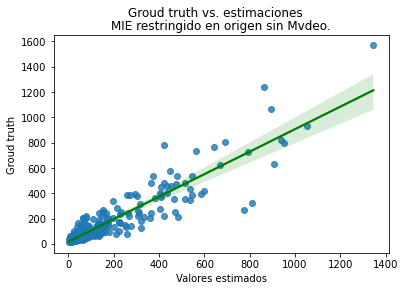

In [23]:
actual_counts = dd_deptos_no_mvo.personas_mig
predicted_counts = prodSim.predict()

print_scores_simple(actual_counts, predicted_counts)


subtitle = 'MIE restringido en origen sin Mvdeo.'
plot_gt(actual_counts, predicted_counts, title, subtitle)

In [9]:
# matriz de los valores estimados
dd_deptos['prodsimest'] = np.round(predicted_counts)

pd.pivot_table(dd_deptos,
values='prodsimest',
index ='depto_origen',
columns='depto_destino',
fill_value=0,
aggfunc=sum,
margins=True,
margins_name='Total')

depto_destino,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,Total
depto_origen,,,,,,,,,,,,,,,,,,,,
1,0,589,31883,826,2669,1043,540,1911,1277,4978,1384,1128,973,953,1289,4215,1348,983,665,58654.0
2,1691,0,577,139,206,103,50,105,79,271,272,171,357,88,435,166,159,215,81,5165.0
3,13403,84,0,122,355,153,79,300,202,754,200,161,140,143,185,516,193,142,100,17232.0
4,1639,96,577,0,165,103,43,104,98,318,150,103,198,117,174,147,110,157,161,4460.0
5,2139,57,677,66,0,95,64,112,70,249,165,156,90,63,142,253,214,92,47,4751.0
6,1522,52,531,75,173,0,72,121,69,213,127,99,91,60,116,155,116,106,58,3756.0
7,626,20,218,25,93,57,0,46,24,80,61,49,34,21,49,78,61,38,18,1598.0
8,1929,37,722,53,141,84,40,0,74,232,89,68,62,54,81,188,78,66,43,4041.0
9,1560,34,586,60,107,57,25,90,0,358,70,53,57,75,67,122,61,56,55,3493.0


In [10]:
prodSim.save("modelos/restringido_origen_noMVO.pickle")